In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
   
from pycaret.classification import *

In [2]:
data = pd.read_csv('data/Financial Distress.csv')

In [3]:
data.shape

(3672, 86)

In [4]:
data.columns

Index(['Company', 'Time', 'Financial Distress', 'x1', 'x2', 'x3', 'x4', 'x5',
       'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16',
       'x17', 'x18', 'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26',
       'x27', 'x28', 'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36',
       'x37', 'x38', 'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46',
       'x47', 'x48', 'x49', 'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56',
       'x57', 'x58', 'x59', 'x60', 'x61', 'x62', 'x63', 'x64', 'x65', 'x66',
       'x67', 'x68', 'x69', 'x70', 'x71', 'x72', 'x73', 'x74', 'x75', 'x76',
       'x77', 'x78', 'x79', 'x80', 'x81', 'x82', 'x83'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             3672 non-null   int64  
 1   Time                3672 non-null   int64  
 2   Financial Distress  3672 non-null   float64
 3   x1                  3672 non-null   float64
 4   x2                  3672 non-null   float64
 5   x3                  3672 non-null   float64
 6   x4                  3672 non-null   float64
 7   x5                  3672 non-null   float64
 8   x6                  3672 non-null   float64
 9   x7                  3672 non-null   float64
 10  x8                  3672 non-null   float64
 11  x9                  3672 non-null   float64
 12  x10                 3672 non-null   float64
 13  x11                 3672 non-null   float64
 14  x12                 3672 non-null   float64
 15  x13                 3672 non-null   float64
 16  x14   

In [6]:
data['Company'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [7]:
data['Time'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

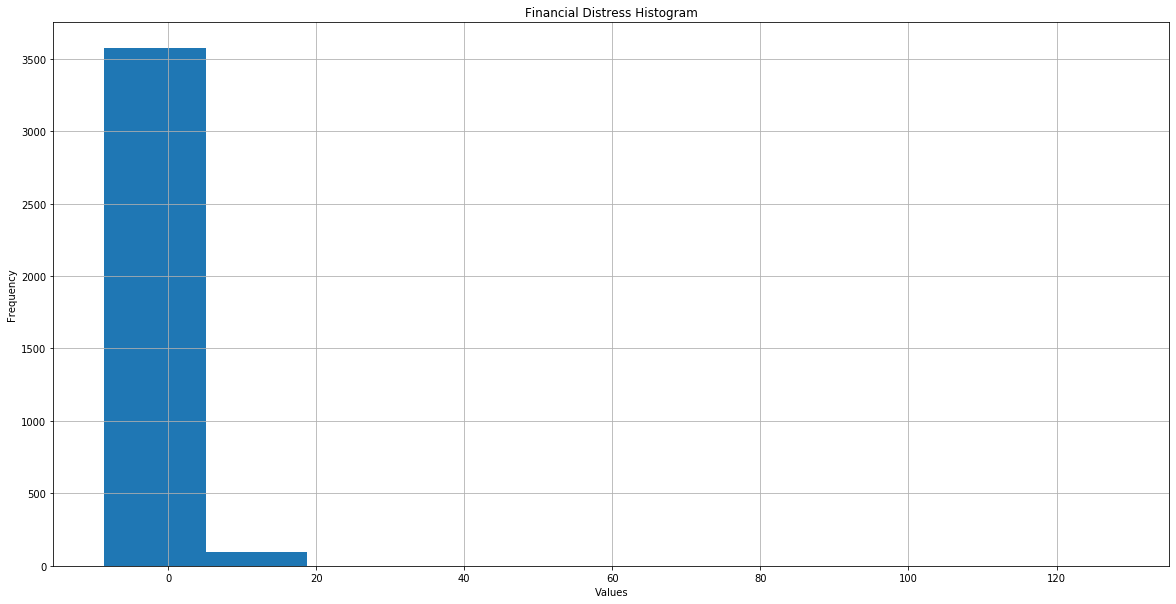

In [8]:
plt.figure(figsize=(20,10))
plt.hist(data['Financial Distress'])
plt.title('Financial Distress Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [9]:
data['Financial Distress'].describe()

count    3672.000000
mean        1.040257
std         2.652227
min        -8.631700
25%         0.172275
50%         0.583805
75%         1.351750
max       128.400000
Name: Financial Distress, dtype: float64

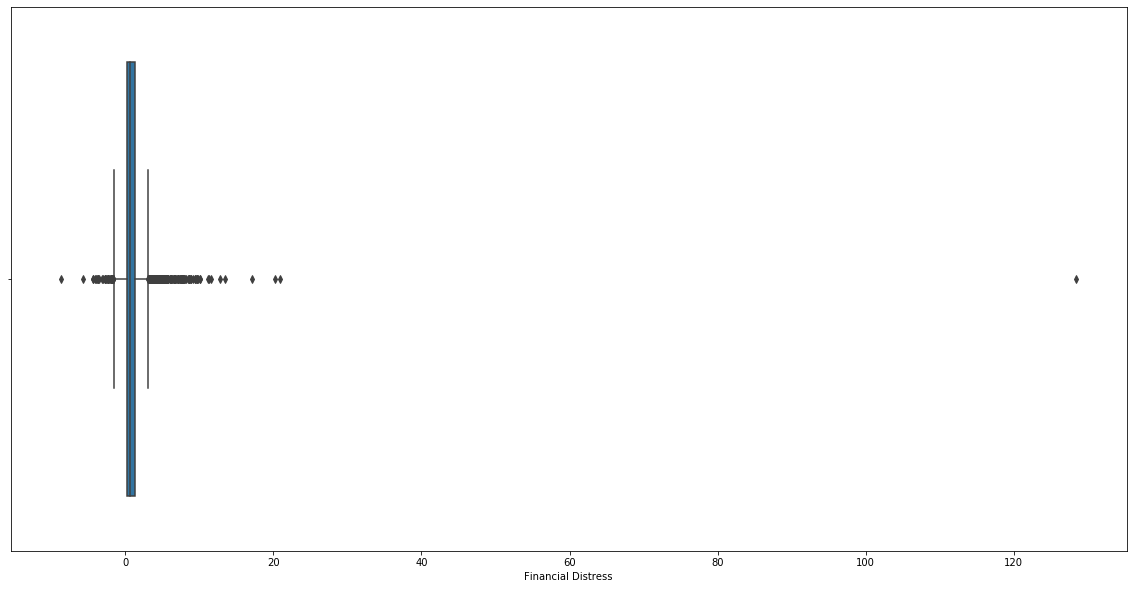

In [10]:
plt.figure(figsize=(20,10))
sns.boxplot(x=data['Financial Distress'])

In [11]:
max(data['Financial Distress'])

128.4

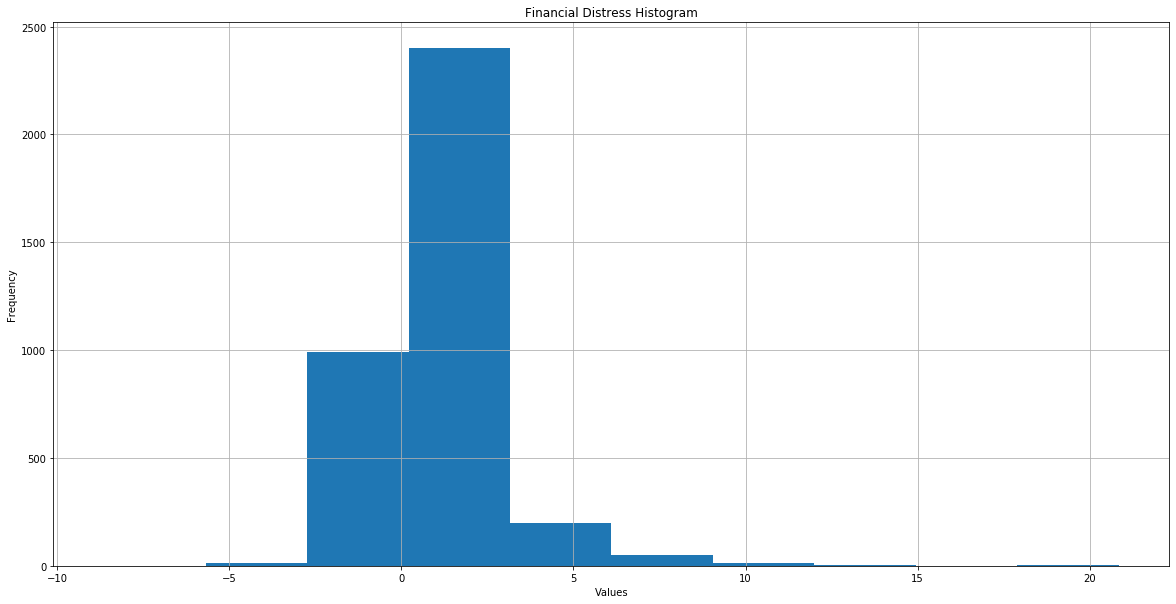

In [12]:
plt.figure(figsize=(20,10))
plt.hist(data[data['Financial Distress'] < 100]['Financial Distress'])
plt.title('Financial Distress Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [13]:
pd.qcut(data['Financial Distress'], 3).value_counts()

(1.021, 128.4]     1224
(0.295, 1.021]     1224
(-8.633, 0.295]    1224
Name: Financial Distress, dtype: int64

In [14]:
data['status'] = np.where(data['Financial Distress'] < 0.295,0,np.where(data['Financial Distress'] < 1.021, 1,2))

In [15]:
data['status'].value_counts()

2    1225
1    1224
0    1223
Name: status, dtype: int64

In [16]:
data_one_period = data.drop_duplicates(subset=['Company'], keep='last')

In [17]:
data_one_period.shape

(422, 87)

In [18]:
data_one_period['status'].value_counts()

0    231
1    102
2     89
Name: status, dtype: int64

In [19]:
data_one_period.head()

,Company,Time,Financial Distress,x1,x2,x3,x4,x5,x6,x7,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,status
3,1,4,-0.56657,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,...,39.80,38.377,17.167,16.0,5.6,22,-0.32539,33,52,0
17,2,14,2.23200,2.2263,0.325880,0.40651,0.90804,0.455340,0.493550,1.65280,...,227.50,214.500,21.000,20.5,8.6,29,2.65980,20,40,2
18,3,1,-1.65990,0.8744,-0.034676,0.79350,0.60952,-0.002632,-0.086847,0.50609,...,27.07,26.102,16.000,16.0,0.2,25,-0.30317,8,37,0
32,4,14,1.27700,3.1096,0.133630,0.21635,0.70654,0.173030,0.446080,1.25870,...,227.50,214.500,21.000,20.5,8.6,12,1.09640,41,57,2
46,5,14,1.63780,1.2121,0.084192,0.70161,0.33803,0.130500,0.144520,0.93530,...,227.50,214.500,21.000,20.5,8.6,23,1.53660,25,50,2


In [20]:
data_final = data_one_period.drop(['Financial Distress', 'Company'], axis=1)

In [21]:
data_final.head()

,Time,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x75,x76,x77,x78,x79,x80,x81,x82,x83,status
3,4,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,-0.10791,...,39.80,38.377,17.167,16.0,5.6,22,-0.32539,33,52,0
17,14,2.2263,0.325880,0.40651,0.90804,0.455340,0.493550,1.65280,0.358880,0.54909,...,227.50,214.500,21.000,20.5,8.6,29,2.65980,20,40,2
18,1,0.8744,-0.034676,0.79350,0.60952,-0.002632,-0.086847,0.50609,-0.056892,-0.16793,...,27.07,26.102,16.000,16.0,0.2,25,-0.30317,8,37,0
32,14,3.1096,0.133630,0.21635,0.70654,0.173030,0.446080,1.25870,0.189140,0.17053,...,227.50,214.500,21.000,20.5,8.6,12,1.09640,41,57,2
46,14,1.2121,0.084192,0.70161,0.33803,0.130500,0.144520,0.93530,0.249060,0.28215,...,227.50,214.500,21.000,20.5,8.6,23,1.53660,25,50,2


In [22]:
#plt.figure(figsize=(20,10))
#plt.title('Correlation Matrix')
#sns.heatmap(data_final.corr(), annot=True)
#plt.show()

In [23]:
abs(data_final.corr()['status']).sort_values(ascending=True)

x28       0.002354
x35       0.016076
x39       0.020654
x82       0.021716
x20       0.039651
            ...   
x5        0.605355
x81       0.609253
x2        0.620442
x10       0.739800
status    1.000000
Name: status, Length: 85, dtype: float64

In [24]:
classification = setup(data_final, target = 'status', session_id = 42,normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.75, train_size = 0.7,
                       silent = False) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(422, 85)"
4,Missing Values,False
5,Numeric Features,83
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [25]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Light Gradient Boosting Machine,0.749300,0.000000,0.697000,0.750500,0.741400,0.577300
1,CatBoost Classifier,0.748900,0.000000,0.686300,0.752600,0.739500,0.571500
2,Gradient Boosting Classifier,0.735100,0.000000,0.676200,0.749700,0.726700,0.554500
3,Ada Boost Classifier,0.729100,0.000000,0.673600,0.744300,0.719200,0.543500
4,Extra Trees Classifier,0.729000,0.000000,0.659600,0.738200,0.719600,0.535800
5,Extreme Gradient Boosting,0.725400,0.000000,0.674300,0.733500,0.714700,0.538800
6,Random Forest Classifier,0.722200,0.000000,0.655600,0.731200,0.712400,0.526700
7,SVM - Linear Kernel,0.715400,0.000000,0.665700,0.716000,0.707400,0.519100
8,Logistic Regression,0.708200,0.000000,0.644100,0.700700,0.695700,0.503200
9,Linear Discriminant Analysis,0.691000,0.000000,0.645700,0.703900,0.688900,0.490500


In [26]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7000,0.0,0.5677,0.6867,0.6790,0.4523
1,0.6667,0.0,0.6200,0.7022,0.6812,0.4505
2,0.7333,0.0,0.6597,0.7200,0.7130,0.5294
3,0.7000,0.0,0.5982,0.6889,0.6711,0.4706
4,0.7667,0.0,0.7470,0.7667,0.7667,0.6154
5,0.6897,0.0,0.6091,0.6954,0.6809,0.4811
6,0.7931,0.0,0.6984,0.7750,0.7756,0.6314
7,0.7241,0.0,0.6915,0.7701,0.7360,0.5623
8,0.8276,0.0,0.7619,0.8697,0.7921,0.7010
9,0.6207,0.0,0.6022,0.6374,0.6283,0.3733


In [27]:
tuned_rf = tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.6825,0.8275,0.7763,0.6341
1,0.6667,0.0,0.6279,0.6667,0.6667,0.4297
2,0.7000,0.0,0.6250,0.7263,0.6933,0.4747
3,0.7667,0.0,0.6667,0.7572,0.7449,0.5882
4,0.7333,0.0,0.6726,0.7425,0.7325,0.5531
5,0.7241,0.0,0.6300,0.7016,0.7093,0.5285
6,0.7931,0.0,0.7063,0.8342,0.7569,0.6176
7,0.7931,0.0,0.7599,0.8190,0.8007,0.6654
8,0.8276,0.0,0.7540,0.8192,0.8101,0.6998
9,0.5517,0.0,0.5337,0.5720,0.5592,0.2736


In [28]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [29]:
gb = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.7465,0.8056,0.7950,0.6565
1,0.7667,0.0,0.7428,0.7884,0.7741,0.6161
2,0.7667,0.0,0.6806,0.7663,0.7443,0.5800
3,0.7667,0.0,0.6667,0.7447,0.7479,0.5954
4,0.7333,0.0,0.6458,0.7244,0.7204,0.5376
5,0.6552,0.0,0.6151,0.7127,0.6715,0.4539
6,0.8276,0.0,0.7619,0.8601,0.7887,0.6882
7,0.6897,0.0,0.6627,0.7644,0.7120,0.5158
8,0.7931,0.0,0.7063,0.7807,0.7636,0.6405
9,0.5517,0.0,0.5337,0.5501,0.5496,0.2608


In [30]:
tuned_gb = tune_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.7185,0.8230,0.7926,0.6421
1,0.7000,0.0,0.6755,0.7215,0.7076,0.5064
2,0.7000,0.0,0.6389,0.7067,0.6891,0.4685
3,0.7000,0.0,0.5982,0.7525,0.6683,0.4512
4,0.7667,0.0,0.7202,0.7670,0.7653,0.6089
5,0.7241,0.0,0.6300,0.7016,0.7093,0.5285
6,0.7586,0.0,0.6429,0.7405,0.7400,0.5690
7,0.7241,0.0,0.6994,0.7126,0.7087,0.5469
8,0.8621,0.0,0.8095,0.8870,0.8414,0.7603
9,0.5862,0.0,0.5546,0.5673,0.5756,0.3054


In [31]:
evaluate_model(tuned_gb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [32]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7000,0.0,0.7236,0.7694,0.7106,0.5312
1,0.5667,0.0,0.5411,0.6417,0.5769,0.3299
2,0.6333,0.0,0.6319,0.6946,0.6388,0.4310
3,0.7000,0.0,0.6250,0.7000,0.6888,0.5055
4,0.7333,0.0,0.7798,0.8114,0.7376,0.6000
5,0.5172,0.0,0.4970,0.6435,0.5515,0.2737
6,0.6897,0.0,0.6438,0.7594,0.6897,0.5019
7,0.6897,0.0,0.6438,0.7594,0.6897,0.5019
8,0.7241,0.0,0.6915,0.7759,0.7354,0.5631
9,0.4828,0.0,0.5109,0.5843,0.4976,0.2328


In [33]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9000,0.0,0.8413,0.9070,0.8952,0.8214
1,0.6667,0.0,0.6279,0.6800,0.6655,0.4536
2,0.7000,0.0,0.6042,0.7236,0.6775,0.4490
3,0.7667,0.0,0.6935,0.7595,0.7618,0.6089
4,0.7000,0.0,0.6518,0.7237,0.7056,0.5055
5,0.6552,0.0,0.5883,0.6621,0.6552,0.4325
6,0.7931,0.0,0.7331,0.7886,0.7776,0.6398
7,0.6552,0.0,0.5883,0.6621,0.6552,0.4325
8,0.7586,0.0,0.6855,0.7529,0.7429,0.5964
9,0.5172,0.0,0.5129,0.5185,0.5133,0.2192


In [34]:
print(bagged_dt)

OneVsRestClassifier(estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                                                                      min_samples_leaf=1,
                                              

In [35]:
boosted_dt = ensemble_model(dt, method = 'Boosting', n_estimators=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7000,0.0,0.6877,0.7597,0.7098,0.5221
1,0.5333,0.0,0.5215,0.6318,0.5492,0.2905
2,0.6333,0.0,0.6319,0.7056,0.6444,0.4388
3,0.7000,0.0,0.6250,0.7000,0.6888,0.5055
4,0.8000,0.0,0.8482,0.8522,0.8017,0.6954
5,0.5172,0.0,0.4970,0.6435,0.5515,0.2737
6,0.7241,0.0,0.6915,0.7606,0.7282,0.5556
7,0.6552,0.0,0.6042,0.6010,0.6023,0.4487
8,0.7241,0.0,0.6915,0.7701,0.7360,0.5623
9,0.5862,0.0,0.6081,0.6805,0.6018,0.3763


In [36]:
tuned_bagged_dt = tune_model('dt', ensemble=True, method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8333,0.0,0.7302,0.8626,0.8102,0.7012
1,0.7000,0.0,0.6755,0.7146,0.7065,0.4963
2,0.8333,0.0,0.7986,0.8349,0.8302,0.7148
3,0.8000,0.0,0.7143,0.8000,0.7852,0.6471
4,0.7333,0.0,0.6994,0.7444,0.7373,0.5604
5,0.7586,0.0,0.6776,0.7655,0.7562,0.5956
6,0.8276,0.0,0.7540,0.8181,0.8085,0.6934
7,0.7586,0.0,0.7202,0.7678,0.7345,0.5972
8,0.8621,0.0,0.8095,0.8870,0.8414,0.7603
9,0.6552,0.0,0.6845,0.6701,0.6544,0.4518


In [37]:
blend_soft = blend_models(method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7667,0.0,0.6989,0.8019,0.7649,0.5906
1,0.7333,0.0,0.7232,0.7728,0.7458,0.5691
2,0.7000,0.0,0.6597,0.7264,0.7057,0.4925
3,0.6667,0.0,0.5506,0.6333,0.6389,0.4118
4,0.7667,0.0,0.7202,0.7830,0.7681,0.6154
5,0.6897,0.0,0.6359,0.7250,0.6999,0.4990
6,0.7931,0.0,0.6984,0.7879,0.7726,0.6242
7,0.7586,0.0,0.7470,0.7813,0.7540,0.6111
8,0.7931,0.0,0.7063,0.7807,0.7636,0.6405
9,0.5517,0.0,0.5873,0.5880,0.5596,0.2980


In [38]:
cb = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8333,0.0,0.7302,0.8626,0.8102,0.7012
1,0.6667,0.0,0.6279,0.6828,0.6699,0.4526
2,0.7000,0.0,0.6389,0.7073,0.6933,0.4767
3,0.8333,0.0,0.7619,0.8302,0.8227,0.7110
4,0.8000,0.0,0.7411,0.7944,0.7937,0.6591
5,0.7241,0.0,0.6567,0.7517,0.7294,0.5469
6,0.8276,0.0,0.7540,0.8181,0.8085,0.6934
7,0.7931,0.0,0.7679,0.7977,0.7845,0.6602
8,0.8276,0.0,0.7540,0.8192,0.8101,0.6998
9,0.4828,0.0,0.4306,0.4625,0.4723,0.1141


In [39]:
egb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7667,0.0,0.6909,0.7733,0.7536,0.5985
1,0.7000,0.0,0.6755,0.7387,0.7115,0.5161
2,0.6667,0.0,0.6181,0.6852,0.6678,0.4275
3,0.7667,0.0,0.6667,0.7575,0.7482,0.5954
4,0.7333,0.0,0.6994,0.7444,0.7373,0.5604
5,0.6897,0.0,0.6359,0.7250,0.6999,0.4990
6,0.8276,0.0,0.7540,0.8181,0.8085,0.6934
7,0.7241,0.0,0.6994,0.7230,0.7057,0.5478
8,0.8276,0.0,0.7619,0.8697,0.7921,0.7010
9,0.5517,0.0,0.5417,0.5000,0.5222,0.2490


In [40]:
lgb = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.7465,0.8068,0.7992,0.6636
1,0.6667,0.0,0.6279,0.6828,0.6699,0.4526
2,0.7000,0.0,0.6389,0.6891,0.6913,0.4867
3,0.8000,0.0,0.7143,0.7913,0.7868,0.6532
4,0.7333,0.0,0.6726,0.7259,0.7264,0.5455
5,0.7931,0.0,0.7252,0.7964,0.7931,0.6527
6,0.7931,0.0,0.7063,0.7733,0.7601,0.6329
7,0.7586,0.0,0.7470,0.8062,0.7559,0.6119
8,0.8621,0.0,0.8363,0.8655,0.8555,0.7689
9,0.5862,0.0,0.5546,0.5673,0.5756,0.3054


In [47]:
tuned_lgb = tune_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.7465,0.8056,0.7950,0.6565
1,0.6667,0.0,0.6279,0.6699,0.6670,0.4413
2,0.6667,0.0,0.6181,0.6852,0.6678,0.4275
3,0.7667,0.0,0.6667,0.7680,0.7441,0.5808
4,0.7333,0.0,0.6726,0.7259,0.7264,0.5455
5,0.6552,0.0,0.5804,0.6915,0.6702,0.4412
6,0.7931,0.0,0.7063,0.7747,0.7594,0.6250
7,0.7586,0.0,0.7202,0.7678,0.7345,0.5972
8,0.7931,0.0,0.7063,0.7807,0.7636,0.6405
9,0.6207,0.0,0.6369,0.6182,0.6141,0.3865


In [42]:
blend_specific_soft = blend_models(estimator_list = [rf, egb, lgb, gb], method = 'soft')
# not catboost for the function

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.7465,0.8056,0.7950,0.6565
1,0.6667,0.0,0.6279,0.6828,0.6699,0.4526
2,0.7000,0.0,0.6389,0.7073,0.6933,0.4767
3,0.8000,0.0,0.7143,0.7913,0.7868,0.6532
4,0.7667,0.0,0.7202,0.7670,0.7653,0.6089
5,0.7241,0.0,0.6567,0.7391,0.7280,0.5460
6,0.7931,0.0,0.7063,0.7747,0.7594,0.6250
7,0.7931,0.0,0.7679,0.7977,0.7845,0.6602
8,0.8621,0.0,0.8095,0.8870,0.8414,0.7603
9,0.5517,0.0,0.5337,0.5501,0.5496,0.2608


In [43]:
blend_specific_hard = blend_models(estimator_list = [rf,egb, lgb, gb], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7667,0.0,0.6909,0.7733,0.7536,0.5985
1,0.6667,0.0,0.6279,0.6828,0.6699,0.4526
2,0.7333,0.0,0.6597,0.7333,0.7187,0.5276
3,0.7667,0.0,0.6667,0.7572,0.7449,0.5882
4,0.7667,0.0,0.7202,0.7670,0.7653,0.6089
5,0.7241,0.0,0.6567,0.7517,0.7294,0.5469
6,0.7931,0.0,0.7063,0.7747,0.7594,0.6250
7,0.7241,0.0,0.6915,0.7479,0.7275,0.5547
8,0.8276,0.0,0.7619,0.8697,0.7921,0.7010
9,0.5172,0.0,0.4861,0.4926,0.5040,0.1896


,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9000,0.0,0.8693,0.9300,0.9017,0.8315
1,0.7000,0.0,0.6475,0.6986,0.6955,0.4981
2,0.7333,0.0,0.6597,0.7333,0.7187,0.5276
3,0.6667,0.0,0.5506,0.6641,0.6438,0.4220
4,0.7333,0.0,0.6458,0.7267,0.7167,0.5294
5,0.6552,0.0,0.5536,0.6396,0.6441,0.4106
6,0.7586,0.0,0.7123,0.7569,0.7512,0.5956
7,0.7241,0.0,0.7262,0.7670,0.7233,0.5639
8,0.7241,0.0,0.6647,0.7086,0.7110,0.5378
9,0.5862,0.0,0.5813,0.5846,0.5841,0.3176


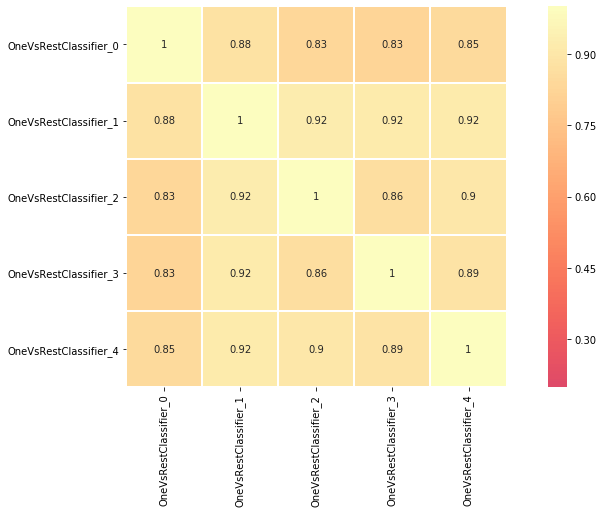

In [44]:
stack_soft = stack_models([rf,egb, lgb, gb, cb], plot=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9000,0.0,0.8693,0.9300,0.9017,0.8315
1,0.7000,0.0,0.6475,0.6986,0.6955,0.4981
2,0.7333,0.0,0.6597,0.7333,0.7187,0.5276
3,0.6667,0.0,0.5506,0.6641,0.6438,0.4220
4,0.7333,0.0,0.6458,0.7267,0.7167,0.5294
5,0.6552,0.0,0.5536,0.6396,0.6441,0.4106
6,0.7586,0.0,0.7123,0.7569,0.7512,0.5956
7,0.7241,0.0,0.7262,0.7670,0.7233,0.5639
8,0.7241,0.0,0.6647,0.7086,0.7110,0.5378
9,0.5862,0.0,0.5813,0.5846,0.5841,0.3176


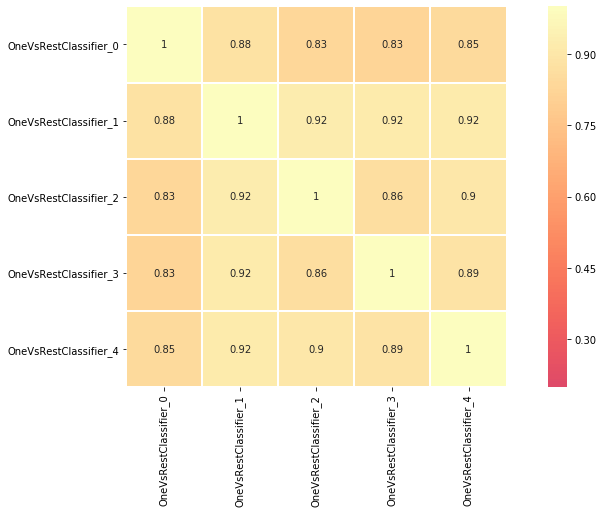

In [45]:
stack_hard = stack_models([rf,egb, lgb, gb, cb],  method='hard', plot=True)

In [46]:
gb_holdout_pred = predict_model(gb)
gb_holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.7087,0,0.6229,0.7075,0.7008,0.4947


,x1,x4,x9,x11,x12,x15,x17,x18,x24,x26,...,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9,status,Label,Score
0,-0.189988,-0.636316,-0.187768,0.204592,-0.126392,-0.144573,-0.187939,-1.198031,0.598223,-0.566037,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9869
1,2.147133,-0.111547,0.562908,1.069302,4.918996,-0.144845,-0.148920,0.794437,-1.666693,1.395777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.5595
2,0.599938,0.912519,0.422151,0.642324,-0.126307,-0.138229,-0.164654,-0.301009,-0.202465,0.622554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,0.5660
3,-0.368985,0.372678,-0.130987,0.658770,-0.126431,-0.145082,-0.167918,-0.339227,1.344060,-0.740414,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9935
4,-0.581827,-0.038999,0.207463,-0.995913,-0.126350,-0.119100,-0.175127,0.429219,-0.334388,0.232112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9516


In [49]:
lgb_holdout_pred = predict_model(lgb)
lgb_holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.7323,0,0.6809,0.7288,0.7301,0.5481


,x1,x4,x9,x11,x12,x15,x17,x18,x24,x26,...,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9,status,Label,Score
0,-0.189988,-0.636316,-0.187768,0.204592,-0.126392,-0.144573,-0.187939,-1.198031,0.598223,-0.566037,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9970
1,2.147133,-0.111547,0.562908,1.069302,4.918996,-0.144845,-0.148920,0.794437,-1.666693,1.395777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.5947
2,0.599938,0.912519,0.422151,0.642324,-0.126307,-0.138229,-0.164654,-0.301009,-0.202465,0.622554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.7955
3,-0.368985,0.372678,-0.130987,0.658770,-0.126431,-0.145082,-0.167918,-0.339227,1.344060,-0.740414,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9996
4,-0.581827,-0.038999,0.207463,-0.995913,-0.126350,-0.119100,-0.175127,0.429219,-0.334388,0.232112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.7621


In [51]:
tuned_gb_holdout_pred = predict_model(tuned_gb)
tuned_gb_holdout_pred.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,One Vs Rest Classifier,0.7559,0,0.6847,0.7522,0.751,0.5823


,x1,x4,x9,x11,x12,x15,x17,x18,x24,x26,...,Time_3,Time_4,Time_5,Time_6,Time_7,Time_8,Time_9,status,Label,Score
0,-0.189988,-0.636316,-0.187768,0.204592,-0.126392,-0.144573,-0.187939,-1.198031,0.598223,-0.566037,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,1.0000
1,2.147133,-0.111547,0.562908,1.069302,4.918996,-0.144845,-0.148920,0.794437,-1.666693,1.395777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,1,0.8826
2,0.599938,0.912519,0.422151,0.642324,-0.126307,-0.138229,-0.164654,-0.301009,-0.202465,0.622554,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.8733
3,-0.368985,0.372678,-0.130987,0.658770,-0.126431,-0.145082,-0.167918,-0.339227,1.344060,-0.740414,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,1.0000
4,-0.581827,-0.038999,0.207463,-0.995913,-0.126350,-0.119100,-0.175127,0.429219,-0.334388,0.232112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0.9985
